In [1]:
library(gstat)
library(sp)
library(spacetime)
library(raster)
library(rgdal)
library(rgeos)

rgdal: version: 1.3-9, (SVN revision 794)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.0, released 2018/12/14
 Path to GDAL shared files: /home/satbigvm/anaconda3/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 5.2.0, September 15th, 2018, [PJ_VERSION: 520]
 Path to PROJ.4 shared files: /home/satbigvm/anaconda3/share/proj
 Linking to sp version: 1.3-1 
rgeos version: 0.3-28, (SVN revision 572)
 GEOS runtime version: 3.7.1-CAPI-1.11.1 0 
 Linking to sp version: 1.3-1 
 Polygon checking: TRUE 



In [2]:
load(file="var_minibus.RData")
# var

In [3]:
print(head(timeDF))

An object of class "STIDF"
Slot "data":
    minibus
1         5
71        1
137       0
205       3
275       1
347       0

Slot "sp":
SpatialPoints:
    Longitude Latitude
1     8595822  3300442
71    8595041  3301527
137   8597133  3301678
205   8600978  3301360
275   8596426  3304672
347   8596329  3303177
Coordinate Reference System (CRS) arguments: +init=epsg:3395 +proj=merc
+lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84
+towgs84=0,0,0 

Slot "time":


Warning message:
“timezone of object (CET) is different than current timezone ().”

                    timeIndex
2019-02-16 08:05:00         1
2019-02-16 08:05:00        71
2019-02-16 08:05:00       137
2019-02-16 08:05:00       205
2019-02-16 08:05:00       275
2019-02-16 08:05:00       347

Slot "endTime":
[1] "2019-02-16 08:05:00 CET" "2019-02-16 08:05:00 CET"
[3] "2019-02-16 08:05:00 CET" "2019-02-16 08:05:00 CET"
[5] "2019-02-16 08:05:00 CET" "2019-02-16 08:05:00 CET"



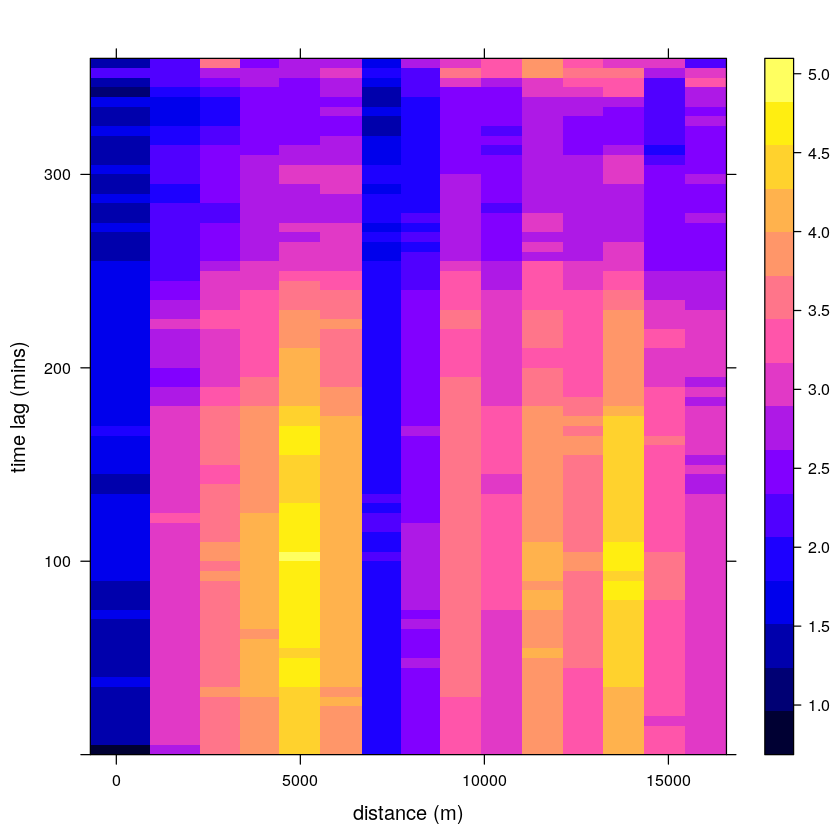

In [4]:
plot(var,map=T)

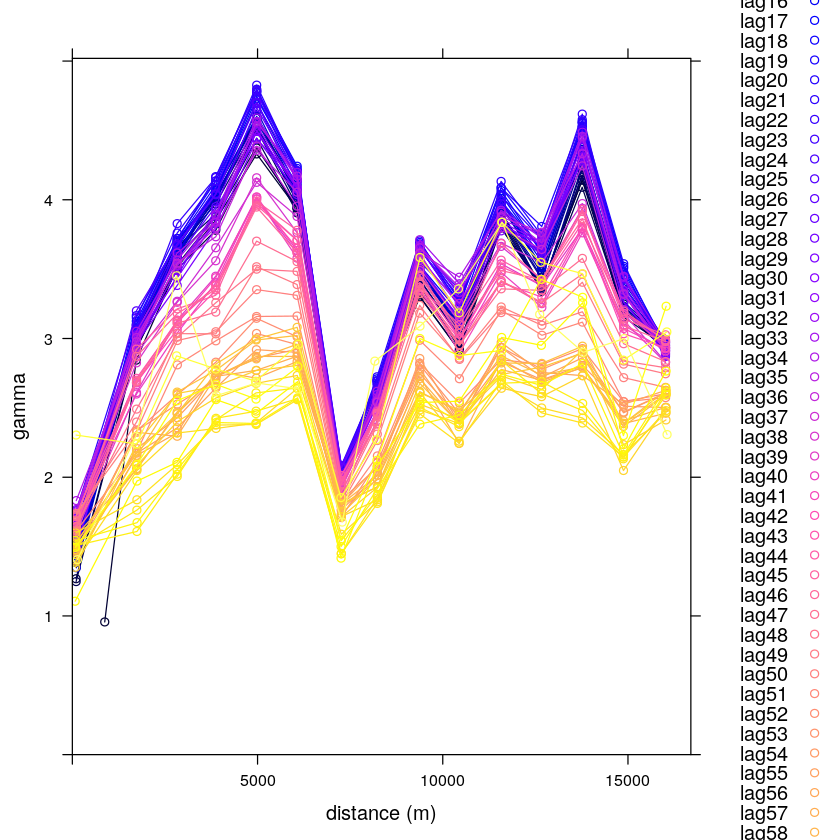

In [5]:
plot(var,map=F)

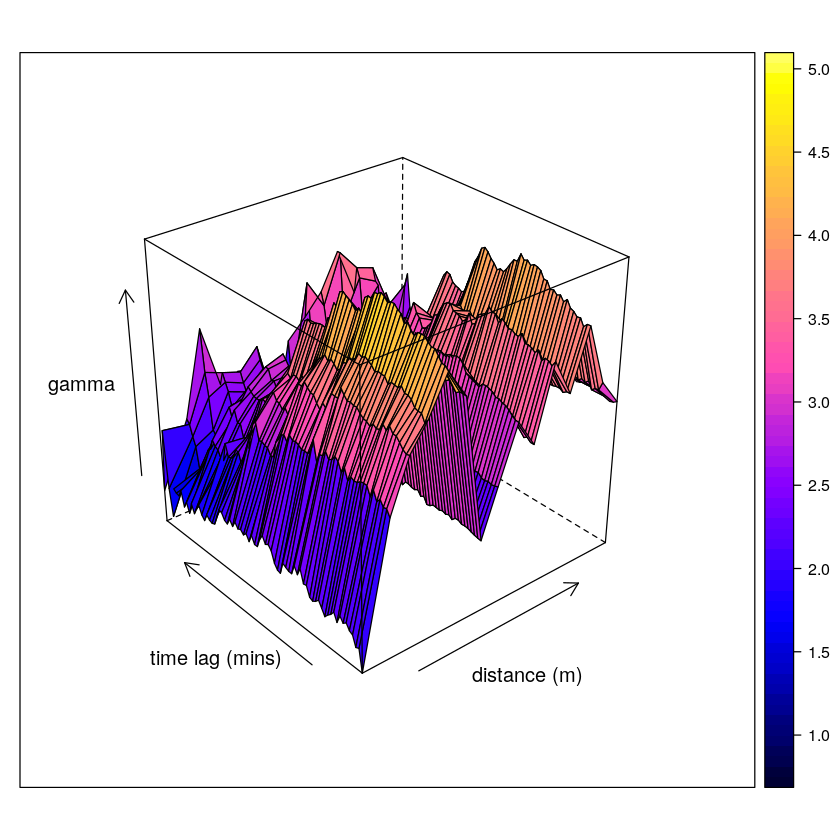

In [6]:
plot(var,wireframe=T)

[1] 0.7480318

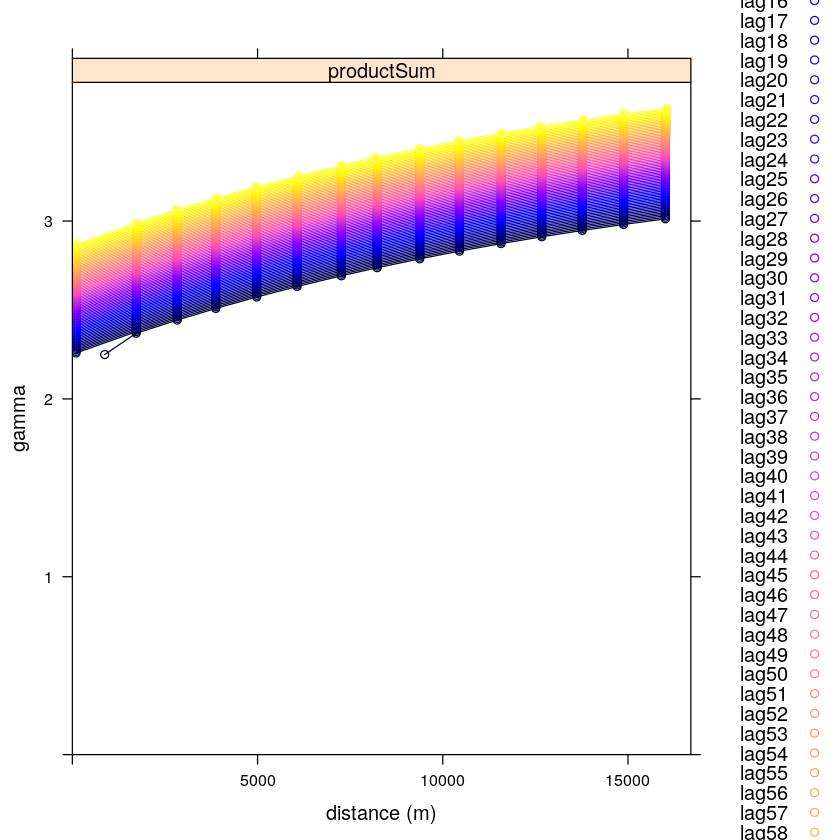

In [7]:
# PRODUCT SUM MODEL
prodSumModel <- vgmST("productSum",space = vgm(8000, "Exp", 12000, 0.5),time = vgm(8000, "Exp",150, 0.5),k = 50) 
prodSumModel_Vgm <- fit.StVariogram(var, prodSumModel,method = "L-BFGS-B",fit.time=TRUE)
ps<-max(attr(prodSumModel_Vgm, "MSE"),0)
ps
plot(var,prodSumModel_Vgm,map=F) 

[1] 0.6389924

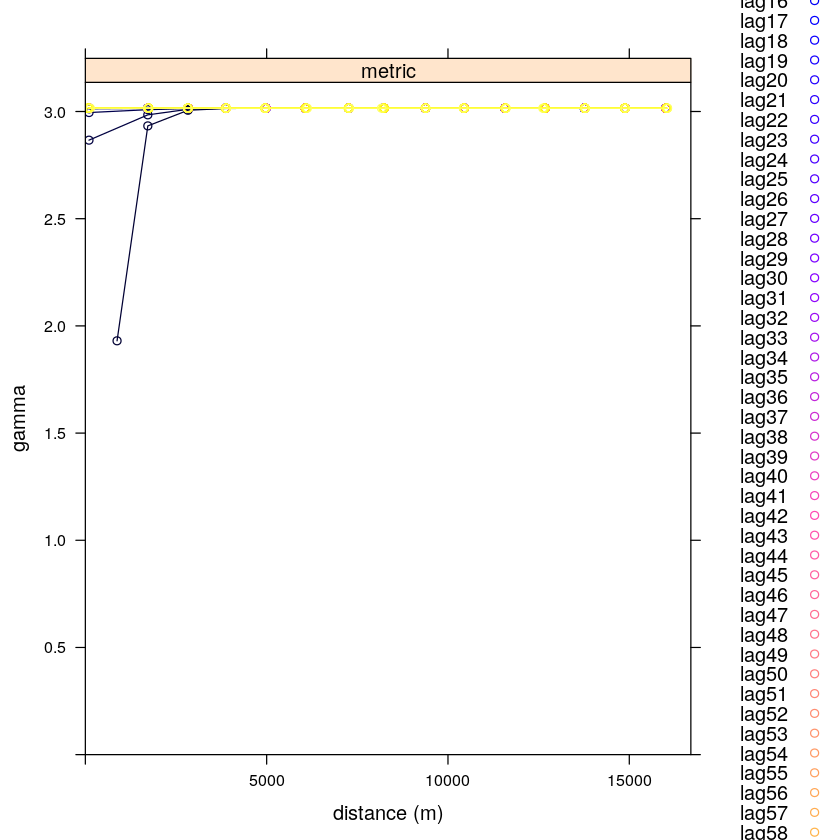

In [8]:
# METRIC
metric <- vgmST("metric", joint = vgm(50,"Mat", 500, 0), stAni=200) 
metric_Vgm <- fit.StVariogram(var, metric, method="L-BFGS-B")
m<-max(attr(metric_Vgm, "MSE"),0)
m
plot(var,metric_Vgm,map=F)

[1] 0.4911786

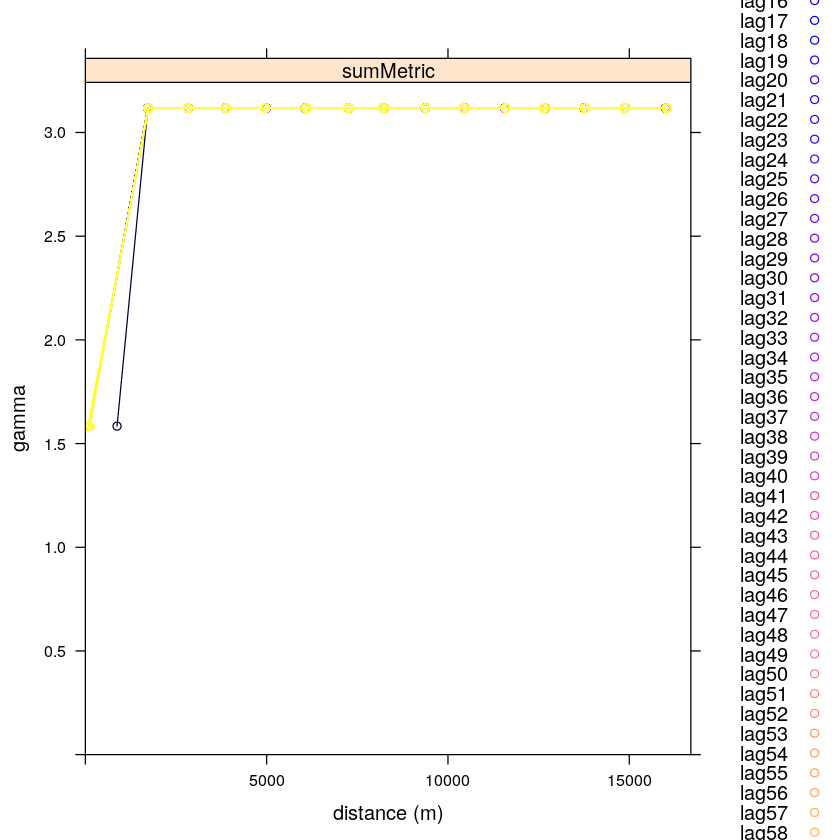

In [9]:
# SUM METRIC
sumMetric <- vgmST("sumMetric", space = vgm(psill=5,"Sph", range=500, nugget=0),time = vgm(psill=500,"Sph", range=500, nugget=0), joint = vgm(psill=1,"Sph", range=500, nugget=10), stAni=500) 
sumMetric_Vgm <- fit.StVariogram(var, sumMetric, method="L-BFGS-B",tunit="mins")
sm<-max(attr(sumMetric_Vgm, "MSE"),0)
sm
plot(var,sumMetric_Vgm,map=F)

[1] 0.4911786

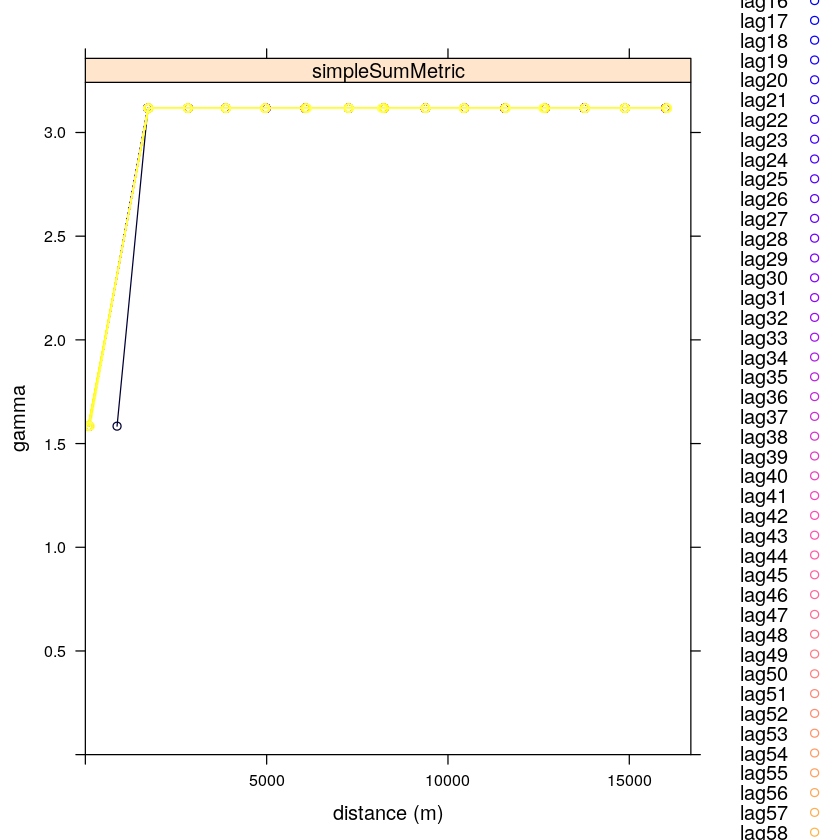

In [10]:
# Simple Sum Metric
SimplesumMetric <- vgmST("simpleSumMetric",space = vgm(5,"Sph", 500, 0),time = vgm(500,"Sph", 500, 0), joint = vgm(1,"Sph", 500, 0), nugget=1, stAni=500)
SimplesumMetric_Vgm <- fit.StVariogram(var, SimplesumMetric,method = "L-BFGS-B")
ssm<-max(attr(SimplesumMetric_Vgm, "MSE"),0)
ssm
plot(var,SimplesumMetric_Vgm,map=F)

In [11]:
# Choose the model which has the least MSE
# list_model <- list(prodSumModel_Vgm,separable_Vgm,metric_Vgm,sumMetric_Vgm,SimplesumMetric_Vgm)
# list_val <- list(ps,s,m,sm,ssm)
# model_chose <- list_model[which.min(list_val)]

In [12]:
test_data <- read.table("../splitupdata/split_0/test_features.csv", sep=",", header=T)
test_label <- read.table("../splitupdata/split_0/test_labels.csv", sep=",", header=T)
head(test_data)
head(test_label)

FID,Latitude,Longitude,Time,Speed,Road.Width,FFS,Area.Type,HGV_r,LGV_r,numSeconds,long,lat,gentime,areaNum
0,28.56961,77.20534,08:05:00,32.29412,13,51,Core,1,1,29100,8594459,3300551,2019-02-16,0
0,28.56961,77.20534,08:10:00,22.40816,13,51,Core,1,1,29400,8594459,3300551,2019-02-16,0
0,28.56961,77.20534,08:15:00,14.44737,13,51,Core,1,1,29700,8594459,3300551,2019-02-16,0
0,28.56961,77.20534,08:20:00,12.47727,13,51,Core,1,1,30000,8594459,3300551,2019-02-16,0
0,28.56961,77.20534,08:25:00,12.62069,13,51,Core,1,1,30300,8594459,3300551,2019-02-16,0
0,28.56961,77.20534,08:30:00,14.07692,13,51,Core,1,1,30600,8594459,3300551,2019-02-16,0


Car,X2.w,X3.w,bus,light.commercial.vehicle,Car...Jeep..Commercial.Yellow.plate.,sumVehicle,minibus,heavy.commercial.vehicles,Others
326,221,78,15,1,11,669,6,4,7
324,225,81,16,0,16,680,5,5,8
320,217,87,14,3,17,682,8,8,8
330,215,86,10,1,16,677,5,4,10
334,203,88,12,2,16,670,4,4,7
317,217,91,15,1,15,666,2,3,5


In [13]:
test_data$minibus <- test_label$minibus
head(test_data)

FID,Latitude,Longitude,Time,Speed,Road.Width,FFS,Area.Type,HGV_r,LGV_r,numSeconds,long,lat,gentime,areaNum,minibus
0,28.56961,77.20534,08:05:00,32.29412,13,51,Core,1,1,29100,8594459,3300551,2019-02-16,0,6
0,28.56961,77.20534,08:10:00,22.40816,13,51,Core,1,1,29400,8594459,3300551,2019-02-16,0,5
0,28.56961,77.20534,08:15:00,14.44737,13,51,Core,1,1,29700,8594459,3300551,2019-02-16,0,8
0,28.56961,77.20534,08:20:00,12.47727,13,51,Core,1,1,30000,8594459,3300551,2019-02-16,0,5
0,28.56961,77.20534,08:25:00,12.62069,13,51,Core,1,1,30300,8594459,3300551,2019-02-16,0,4
0,28.56961,77.20534,08:30:00,14.07692,13,51,Core,1,1,30600,8594459,3300551,2019-02-16,0,2


In [14]:
test_data$gentime <- as.POSIXlt(paste("2019-02-16 ",(paste(test_data$Time))),tz="CEST")
test_data <- na.omit(test_data)
test_data <- test_data[order(test_data$Time),]
test_data_store <- test_data
#Create a SpatialPointsDataFrame
coordinates(test_data)=~Longitude+Latitude
projection(test_data)=CRS("+init=epsg:4326")
#Transform into Mercator Projection
test_vehicles.UTM <- spTransform(test_data,CRS("+init=epsg:3395"))
# Dataframes for STIDF
test_vehiclesSP <- SpatialPoints(test_vehicles.UTM@coords,CRS("+init=epsg:3395"))
test_vehiclesTM <- as.POSIXct(test_vehicles.UTM$gentime,tz="CET")
grid.ST<- STI(test_vehiclesSP,test_vehiclesTM)

In [15]:
# PROD SUM MODEL PREDICTIONS
pred <- krigeST(minibus~1, data=timeDF, modelList=prodSumModel_Vgm, newdata=grid.ST)
predictions <- slot(pred,'data')
test_data_store$krigging_pred <- predictions
final_vals <- test_data_store[,c(16,17)]
names(final_vals)<- c("Actual", "Predicted")
final_vals$difsq <- (final_vals$Actual - final_vals$Predicted)^2
final_vals$dif <- (final_vals$Actual - final_vals$Predicted)
final_vals$absdif <- abs(final_vals$Actual - final_vals$Predicted)
final_vals$reldif <- abs((final_vals$Actual - final_vals$Predicted)/final_vals$Actual)
n <- nrow(final_vals)
rss <- sum(final_vals$difsq)
mse <- rss/n
rmse <- sqrt(mse)
mae <- sum(final_vals$absdif)/n
mape <- sum(final_vals$reldif)/n
# rss
print('MSE')
mse
print('RMSE')
rmse
print('MAE')
mae
print('MAPE')
mape

[1] "MSE"


[1] 10.05938

[1] "RMSE"


[1] 3.171652

[1] "MAE"


[1] 1.636943

[1] "MAPE"


[1] Inf

In [16]:
# METRIC MODEL PREDICTIONS
pred <- krigeST(minibus~1, data=timeDF, modelList=metric_Vgm, newdata=grid.ST)
predictions <- slot(pred,'data')
test_data_store$krigging_pred <- predictions
final_vals <- test_data_store[,c(16,17)]
names(final_vals)<- c("Actual", "Predicted")
final_vals$difsq <- (final_vals$Actual - final_vals$Predicted)^2
final_vals$dif <- (final_vals$Actual - final_vals$Predicted)
final_vals$absdif <- abs(final_vals$Actual - final_vals$Predicted)
final_vals$reldif <- abs((final_vals$Actual - final_vals$Predicted)/final_vals$Actual)
n <- nrow(final_vals)
rss <- sum(final_vals$difsq)
mse <- rss/n
rmse <- sqrt(mse)
mae <- sum(final_vals$absdif)/n
mape <- sum(final_vals$reldif)/n
# rss
print('MSE')
mse
print('RMSE')
rmse
print('MAE')
mae
print('MAPE')
mape


[1] "MSE"


[1] 9.733098

[1] "RMSE"


[1] 3.119791

[1] "MAE"


[1] 1.582659

[1] "MAPE"


[1] Inf

In [17]:
# sumMetric MODEL PREDICTIONS
pred <- krigeST(minibus~1, data=timeDF, modelList=sumMetric_Vgm, newdata=grid.ST)
predictions <- slot(pred,'data')
test_data_store$krigging_pred <- predictions
final_vals <- test_data_store[,c(16,17)]
names(final_vals)<- c("Actual", "Predicted")
final_vals$difsq <- (final_vals$Actual - final_vals$Predicted)^2
final_vals$dif <- (final_vals$Actual - final_vals$Predicted)
final_vals$absdif <- abs(final_vals$Actual - final_vals$Predicted)
final_vals$reldif <- abs((final_vals$Actual - final_vals$Predicted)/final_vals$Actual)
n <- nrow(final_vals)
rss <- sum(final_vals$difsq)
mse <- rss/n
rmse <- sqrt(mse)
mae <- sum(final_vals$absdif)/n
mape <- sum(final_vals$reldif)/n
# rss
print('MSE')
mse
print('RMSE')
rmse
print('MAE')
mae
print('MAPE')
mape


[1] "MSE"


[1] 9.756429

[1] "RMSE"


[1] 3.123528

[1] "MAE"


[1] 1.543367

[1] "MAPE"


[1] Inf

In [18]:
# sumMetric MODEL PREDICTIONS
pred <- krigeST(minibus~1, data=timeDF, modelList=SimplesumMetric_Vgm, newdata=grid.ST)
predictions <- slot(pred,'data')
test_data_store$krigging_pred <- predictions
final_vals <- test_data_store[,c(16,17)]
names(final_vals)<- c("Actual", "Predicted")
final_vals$difsq <- (final_vals$Actual - final_vals$Predicted)^2
final_vals$dif <- (final_vals$Actual - final_vals$Predicted)
final_vals$absdif <- abs(final_vals$Actual - final_vals$Predicted)
final_vals$reldif <- abs((final_vals$Actual - final_vals$Predicted)/final_vals$Actual)
n <- nrow(final_vals)
rss <- sum(final_vals$difsq)
mse <- rss/n
rmse <- sqrt(mse)
mae <- sum(final_vals$absdif)/n
mape <- sum(final_vals$reldif)/n
# rss
print('MSE')
mse
print('RMSE')
rmse
print('MAE')
mae
print('MAPE')
mape


[1] "MSE"


[1] 9.737999

[1] "RMSE"


[1] 3.120577

[1] "MAE"


[1] 1.541173

[1] "MAPE"


[1] Inf